## Гиперболические системы уравнений 
### Вариант 30
### Комаров Николай Б06-902

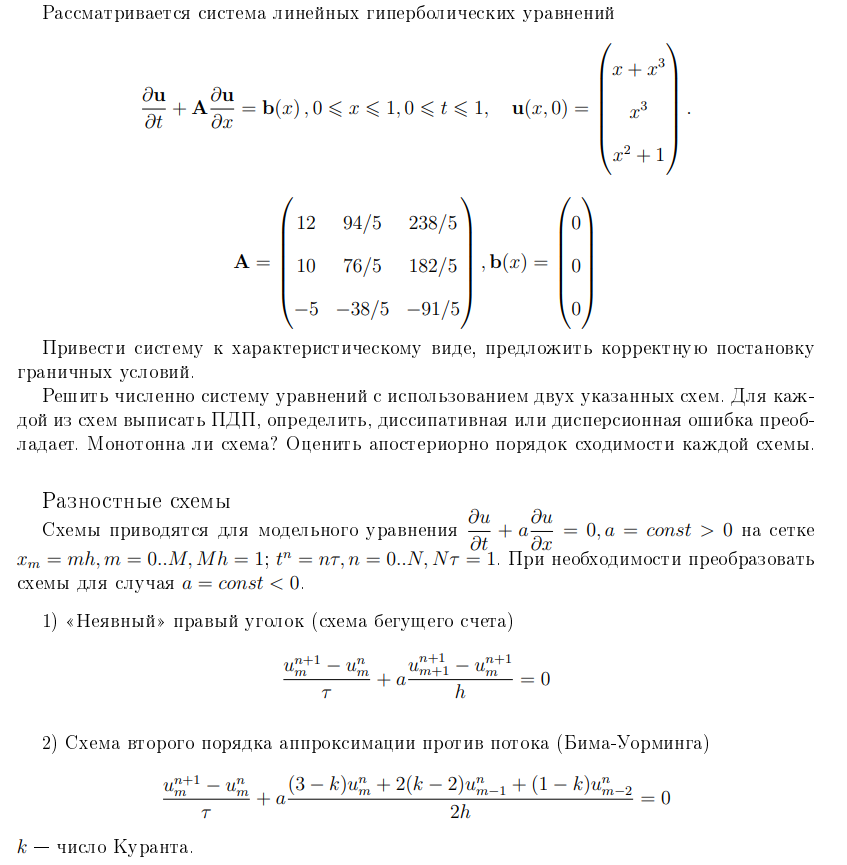

### Характеристический вид системы

Найдем левые собственные числа и собвственные векторы для матрицы системы $A$, для этого достаточно найти правые собвственные числа и векторы матрицы $A^{T}$, так как:
$$ w^{T}A=\lambda w^{T} -> A^{T}w=\lambda w $$
Они равны:
$$
\begin{array}{l}
\lambda_{1}=0, w_{1}^{T}=(0, \frac{1}{2},1) \\
\lambda_{2}=2, w_{2}^{T}=(\frac{5}{28},\frac{9}{28},1) \\
\lambda_{3}=7, w_{3}^{T}=(\frac{5}{21},\frac{8}{21},1)
\end{array}
$$
Таким образом матрицу можно представить в виде:
$$ A = \Omega^{-1} \Lambda \Omega $$
где:
$$ \Omega=\left(\begin{array}{ccc}
0 & \frac{1}{2} & 1 \\
\frac{5}{28} & \frac{9}{28} & 1 \\
\frac{5}{21} & \frac{8}{21} & 1 \\
\end{array}\right) $$
$$ \Lambda=\left(\begin{array}{ccc}
0 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 7 \\
\end{array}\right) $$
Подстановкой убеждается в правильности найденных значений.

###  Представим исходную систему в виде инвариантов Римана
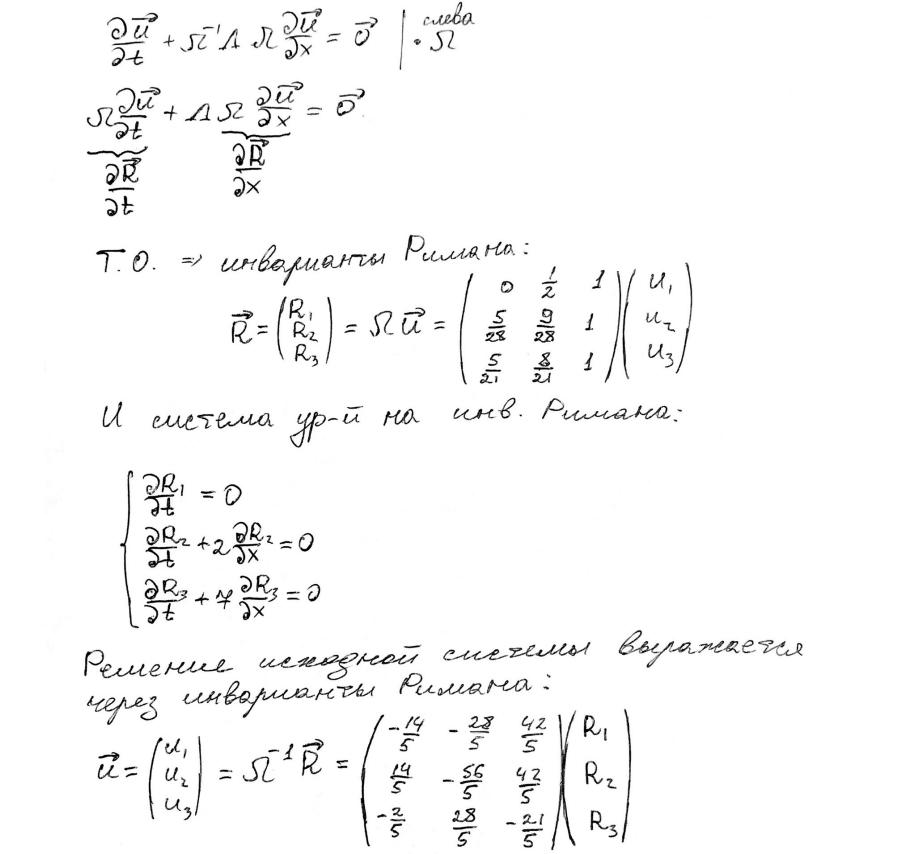

### Постановка начальных условий для уравнений в инивариантах Римана


### Теоретическое решение уравнения
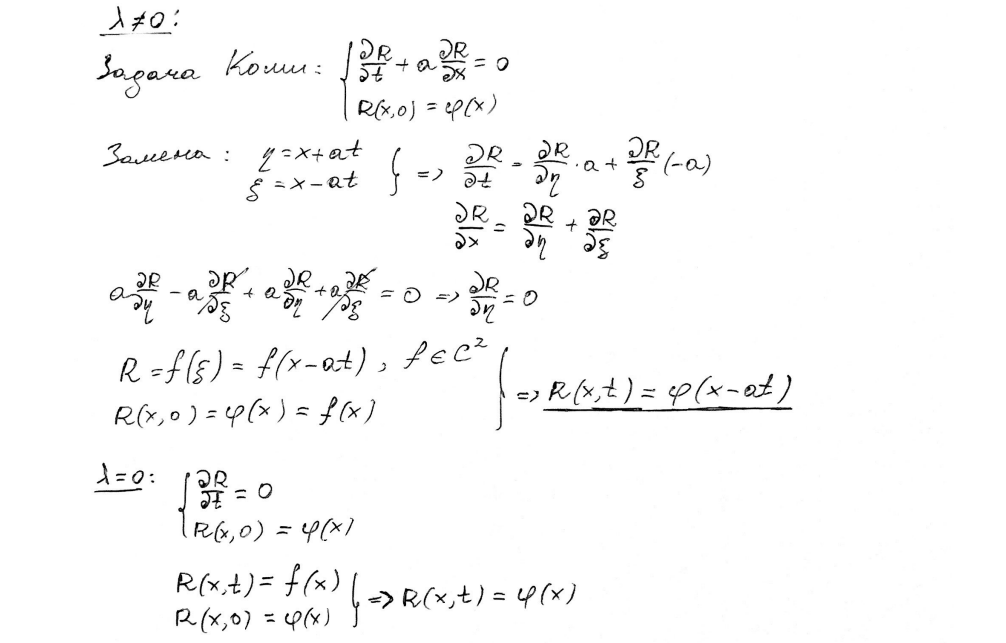

### Корректная постановка граничных условий 
Если скорость переноса $ \lambda > 0 $, то необходимо задавать граничное уловие на левом краю (в 0). Если скорость переноса $ \lambda < 0 $, то необходимо задавать граничное уловие на правом краю (в 1).
В нашем случае: 
$$
\begin{array}{l}
\lambda_{1}=0 \\
\lambda_{2}=2 \\
\lambda_{3}=7
\end{array}
$$
Поэтому нужно 2 условия слева. С учетом предыдущего пункта получаем: 
$$ R_{2}(0, t)=R_{20}(-at) = -\frac{a^{3}}{2} t^{3} + a^{2} t^{2} - \frac{5a}{28}t + 1 =(a=2)= -4t^{3} + 4t^{2} - \frac{5}{14}t + 1$$
$$ R_{3}(0, t)=R_{30}(-at) = -\frac{13a^{3}}{21} t^{3} + a^{2} t^{2} - \frac{5a}{21}t + 1 =(a=7)= -\frac{637}{3}t^{3} + 49t^{2} - \frac{5}{3}t + 1$$

### Итого
Получили 3 раздельные задачи с инвариантами Римана:
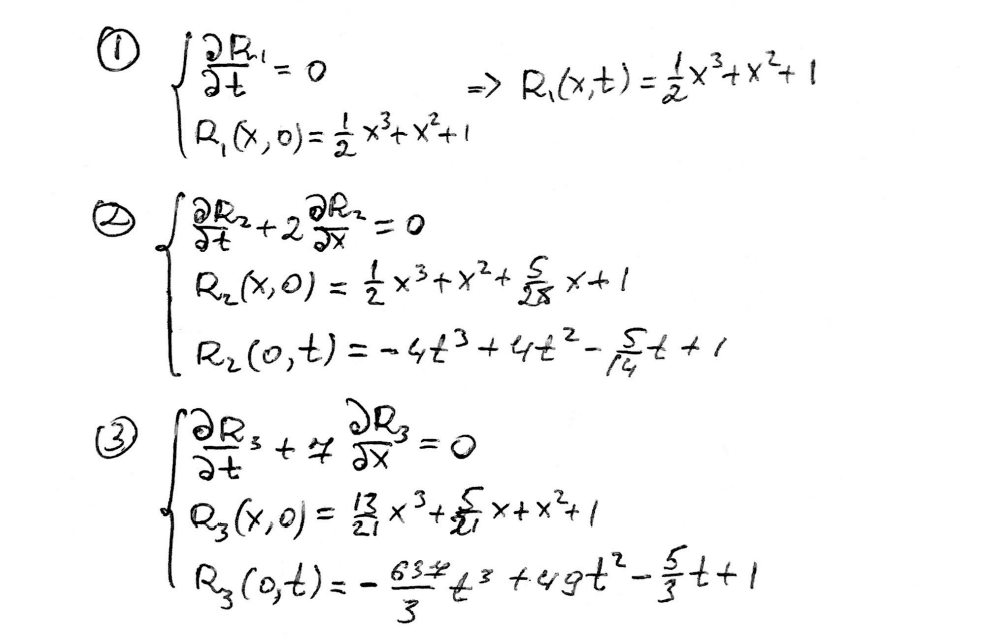

## Схема "неявный" правый уголок
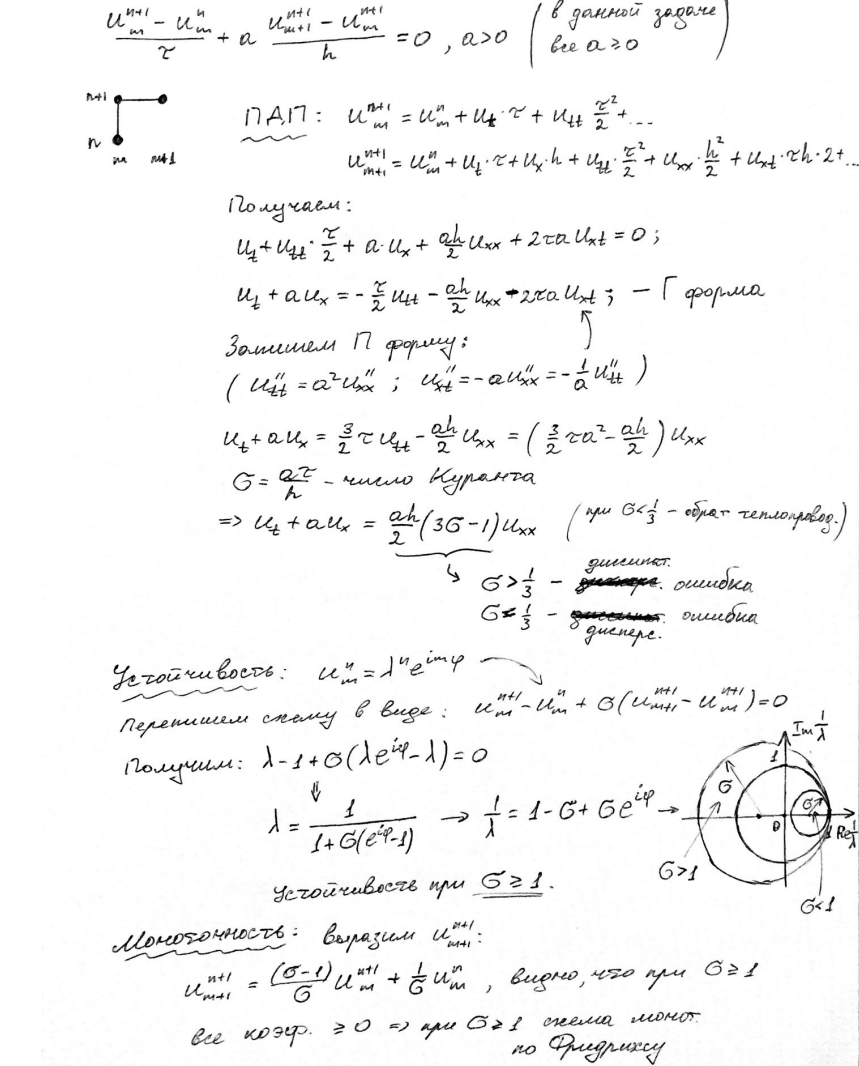

Таким образом получили, что при значении $ \sigma \geqslant 1 $ схема монотонно устойчива и в ней преобладает диссипативная ошибка

### Реализация метода 
(за основу была взята реализация, сделанная Еленой Гришиной Б06-902)

In [1]:
import numpy as np
import scipy.linalg
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import axes
from scipy.optimize import curve_fit

# матрица системы
A = np.array([[12, 94/5, 238/5],
             [10, 76/5, 182/5],
             [-5, -38/5, -91/5]])

L, T = 1, 1

In [2]:
#теоретическое решение
def R_th(x, t, a, R0):
    return R0(x-a*t)

In [25]:
#функция построения графиков с погрешностями
def plot_nev(x, t, u, s, a, R0):
    print('sigma = ', abs(a*tau/h))
    x_, t_ = np.meshgrid(x, t)
    fig = plt.figure(figsize = (24, 6))
    gs2 = gridspec.GridSpec(3, 3)
    
    ax = fig.add_subplot(gs2[:, :1], projection='3d')
    ax.plot_wireframe(x_,t_, u)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel(s)
    ax.set_title(s)
    ax.plot_surface(x_, t_, R_th(x_, t_, a, R0), color = "green", alpha = 0.5)
    
    ax1 = fig.add_subplot(gs2[:2, -2])
    ax1.plot(t, [max(abs(u[n]-R_th(x, n*tau, a, R0))) for n in range(len(t))])
    ax1.set_xlabel("t")
    ax1.set_ylabel("max$_t$|"+s+"-Rth|")
    ax1.set_title("Погрешность по t")
    
    ax2= fig.add_subplot(gs2[:2, -1])
    ax2.plot(x, [max(abs(u[:, m]-R_th(h*m, t, a, R0))) for m in range(len(x))])
    ax2.set_xlabel("x")
    ax2.set_ylabel("max$_x$|"+s+"-Rth|")
    ax2.set_title("Погрешность по x")
    plt.show()

In [29]:
# функция численного решения неявным правым уголком
def RightAngle(a, R0, h, tau):
    sigma= (a*tau/h)
    M, N=int(L/h)+1, int(T/tau)+1
    R = np.zeros(M*N).reshape(N, M)
    R[0, :] = np.array([R0(x) for x in np.arange(0, L+h, h)]).copy()
    
    for n in range(0, N-1):
        if a > 0:
            R[:, 0] = np.array([R0(-a*n*tau) for n in np.arange(N)]).copy()
            for m in range(0, M-1):
                R[n+1, m+1] = R[n+1, m]*(sigma-1)/(sigma)+ R[n, m]/(sigma)
        if a == 0:
            for m in range(0, M):
                R[n+1, m] = R[n, m]
    return R 

In [6]:
#начальные условия инвариантов Римана
R01 = lambda x: 0.5 * x**3 + x**2 + 1
R02 = lambda x: 0.5 * x**3 + x**2 + 5/28 * x + 1
R03 = lambda x: 13/21 * x**3 + x**2 + 5/21 * x + 1

##### Подбор параметров сетки

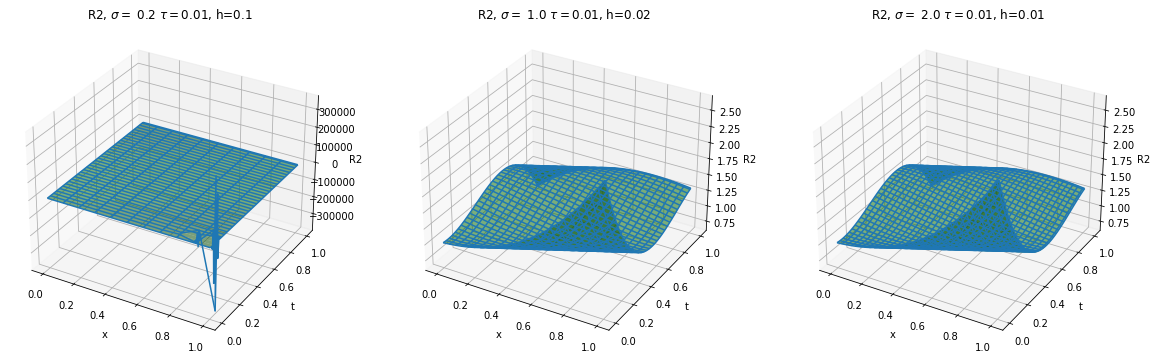

In [30]:
%matplotlib inline
fig = plt.figure(figsize = (20, 6))
tau = 0.01
h = [0.1, 0.02, 0.01]
a = 2
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    R2 = RightAngle(a, R02, h[i], tau)
    x = np.arange(0, L+h[i], h[i])
    t = np.arange(0, T+tau, tau)
    x_, t_ = np.meshgrid(x, t)
    ax.plot_surface(x_, t_, R_th(x_, t_, a, R02), color = "green", alpha = 0.5)
    ax.plot_wireframe(x_,t_, R2)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("R2")
    ax.set_title("R2, $\\sigma=$ "+ str(round(a*tau/h[i], 3))+" $\\tau=$"+str(tau)+", h="+str(h[i]))

При $ \sigma < 1$ устойчивости нет, как и предполагалось, при $ \sigma \geqslant 1$ численное решение хорошо совпадает с теоретическим. (Здесь и далее зеленая поверхность - теор. решение, синяя сетка - численное решение)

#### Расчет инвариантов Римана

sigma =  0.0


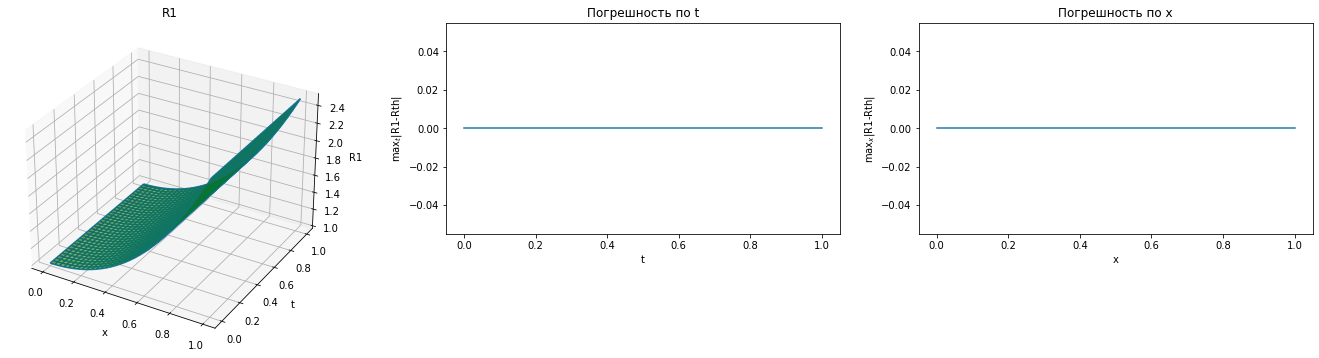

sigma =  2.0


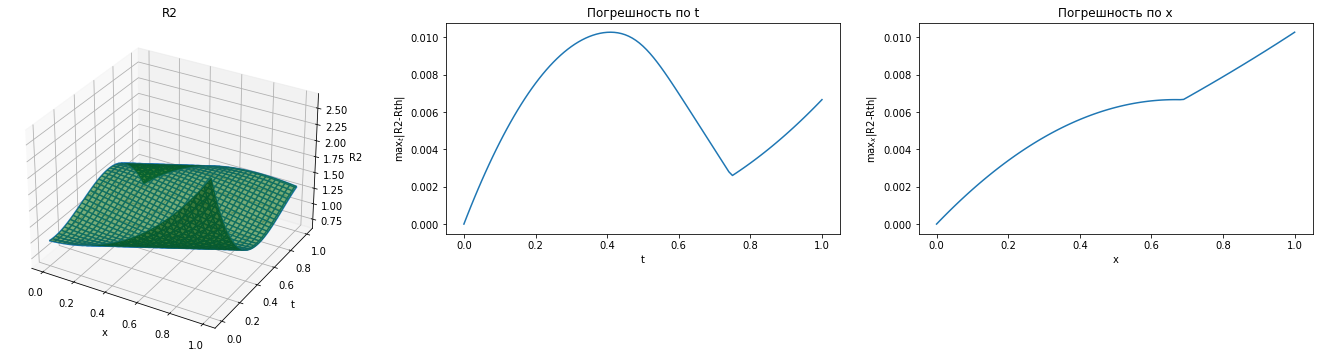

sigma =  7.000000000000001


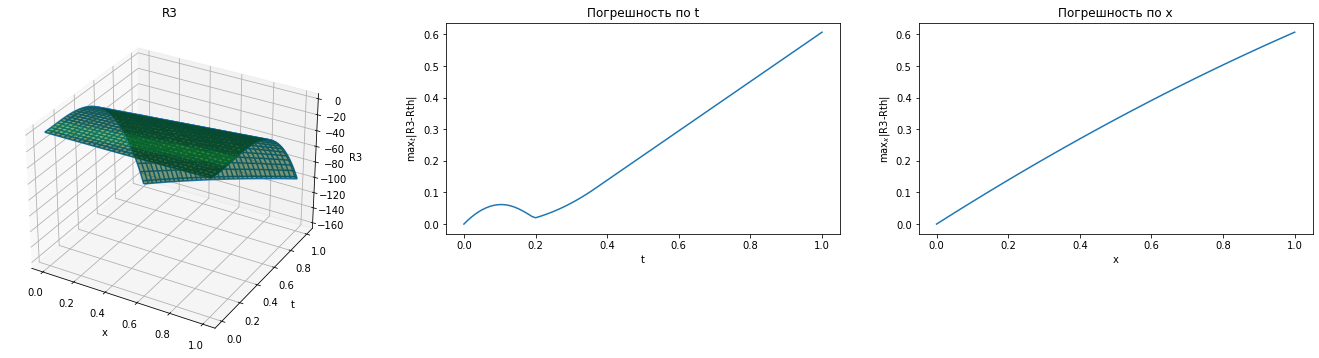

In [90]:
h, tau = 0.01, 0.01
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)
a1 = 0
R1 = RightAngle(a1, R01, h, tau)
plot_nev(x, t, R1, "R1", a1, R01)
a2 = 2
R2 = RightAngle(a2, R02, h, tau)
plot_nev(x, t, R2, "R2", a2, R02)
a3 = 7
R3 = RightAngle(a3, R03, h, tau)
plot_nev(x, t, R3, "R3", a3, R03)

#### Численное решение исходного уравнения 

In [27]:
def u(x, t, R1, R2, R3):
    #print("tau="+str(round(1/len(t), 3))+", h="+str(round(1/len(x), 3)))
    x_, t_ = np.meshgrid(x, t)
    a1 = 0
    a2 = 2
    a3 = 7
    u_calc = [(-14*R1-28*R2+42*R3)/5, (14*R1-56*R2+42*R3)/5, (-2*R1+28*R2-21*R3)/5]
    u_th = [(-14*R_th(x_, t_, a1, R01)-28*R_th(x_, t_, a2, R02)+42*R_th(x_, t_, a3, R03))/5,
            (14*R_th(x_, t_, a1, R01)-56*R_th(x_, t_, a2, R02)+42*R_th(x_, t_, a3, R03))/5,
            (-2*R_th(x_, t_, a1, R01)+28*R_th(x_, t_, a2, R02)-21*R_th(x_, t_, a3, R03))/5]
    nev_t, nev_x = [], []
    for i in range(3):
        fig = plt.figure(figsize = (24, 6))
        gs2 = gridspec.GridSpec(3, 3)
        ax = fig.add_subplot(gs2[:, :1], projection='3d')
        #ax = fig.add_subplot(1, 3, 1, projection='3d')
        ax.plot_surface(x_, t_, u_th[i], color = "green", alpha = 0.5)
        ax.plot_wireframe(x_,t_, u_calc[i])
        ax.set_xlabel("x")
        ax.set_ylabel("t")
        ax.set_zlabel("u"+str(i+1))
        ax = fig.add_subplot(gs2[:2, -2])#fig.add_subplot(1, 3, 2)
        nev_t.append([max(abs(u_calc[i][n]-u_th[i][n])) for n in range(len(t))])
        ax.plot(t, nev_t[-1])
        ax.set_xlabel("t")
        ax.set_ylabel("max$_x|u_{calc}-u_th|$")
        ax.set_title("Погрешность по t")
        ax = fig.add_subplot(gs2[:2, -1])#fig.add_subplot(1, 3, 3)
        nev_x.append([max(abs(u_calc[i][:, m]-u_th[i][:, m])) for m in range(len(x))])
        ax.plot(x, nev_x[-1])
        ax.set_xlabel("x")
        ax.set_ylabel("max$_t|u_{calc}-u_th|$")
        ax.set_title("Погрешность по x")
    return (nev_t, nev_x)

tau=0.01, h=0.01


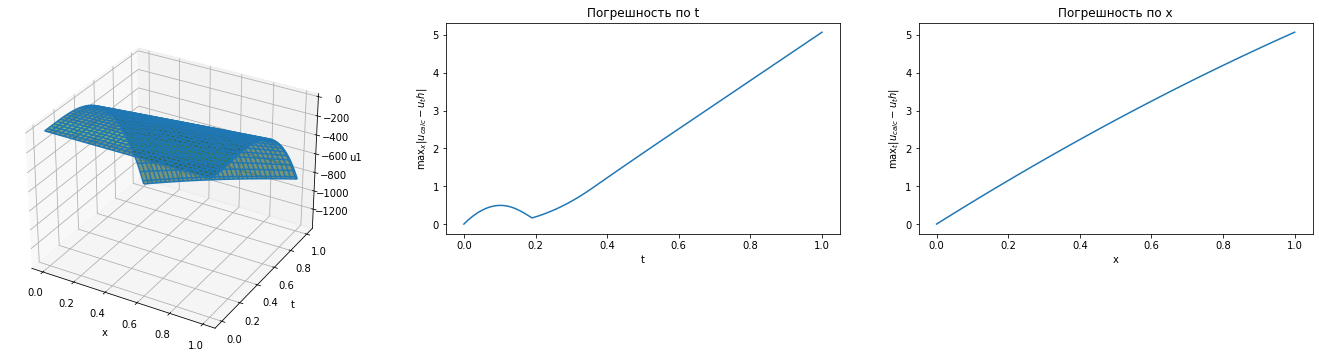

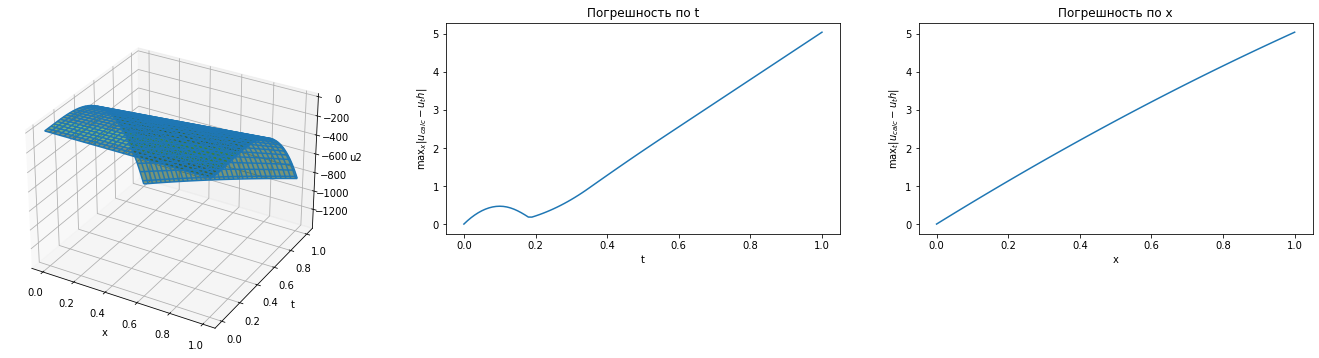

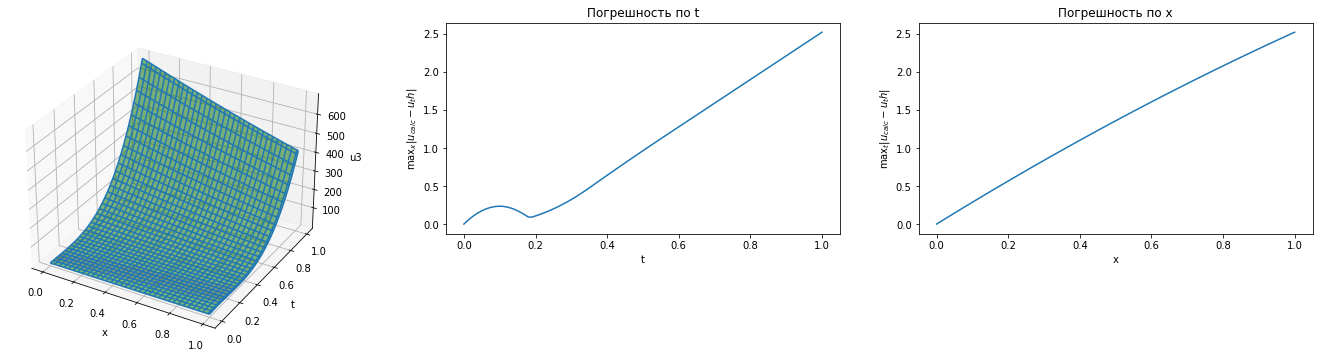

In [91]:
nev_t_right_angle, nev_x_right_angle = u(x, t, R1, R2, R3)

## Схема второго порядка аппроксимации против потока (Бима-Уорминга)
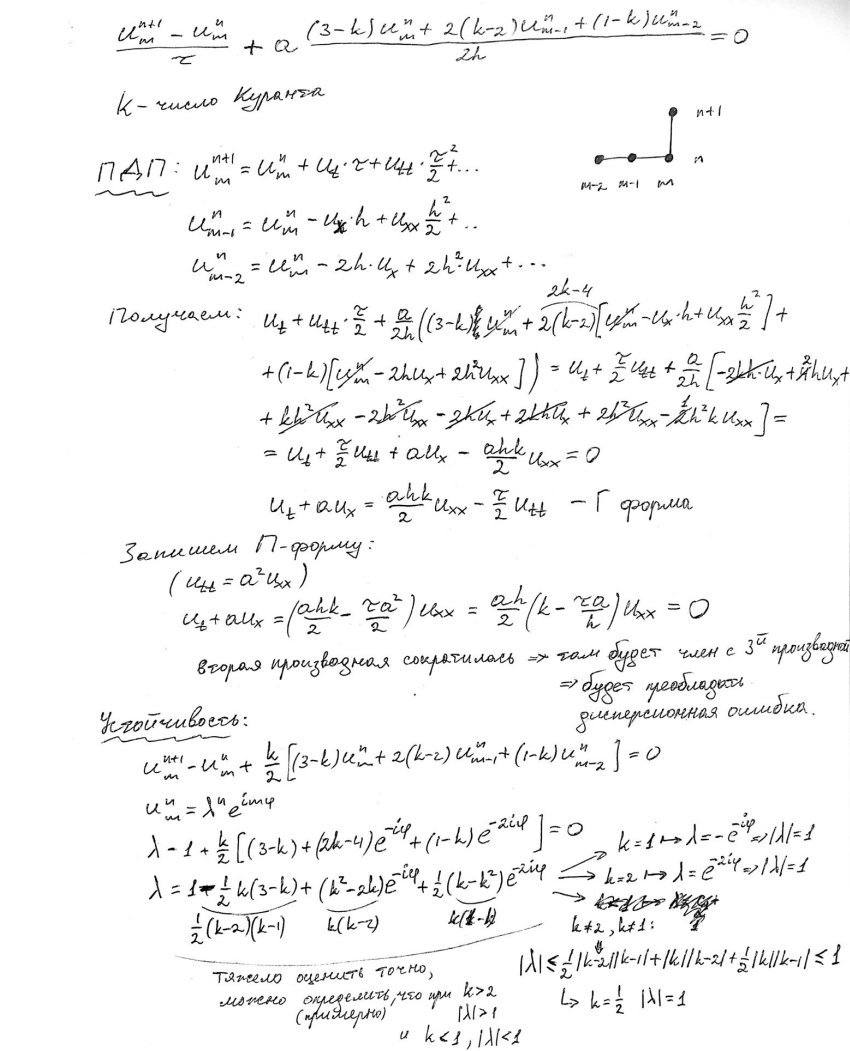
(В ходе численного решения было замечено, что устойчивость сохраняется при $k < 2$)
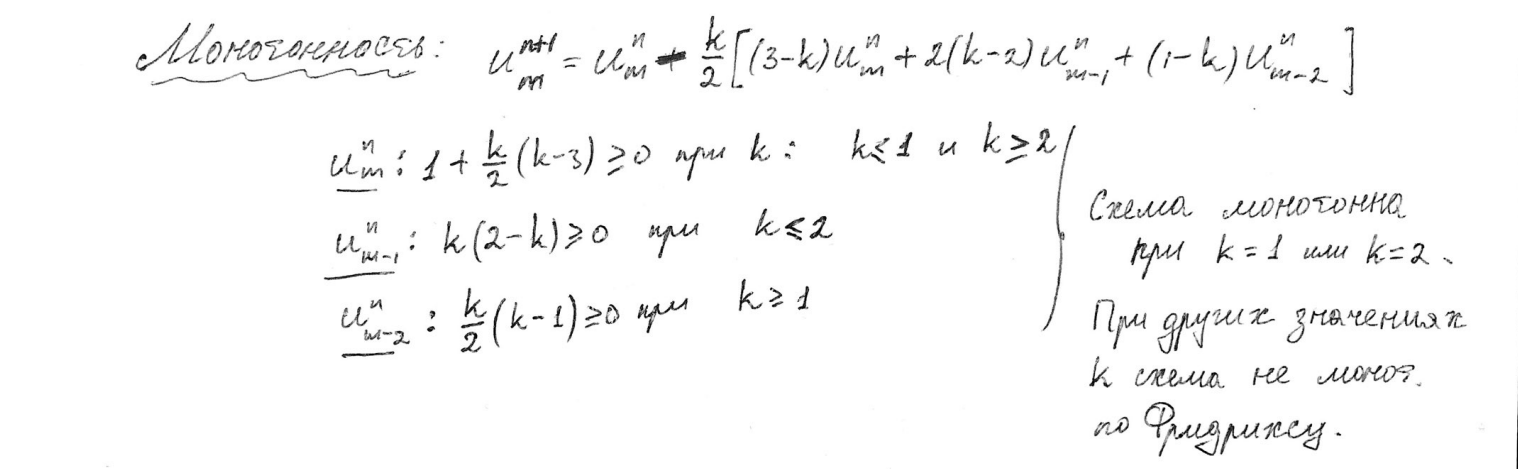

Шаблон имеет недостаток, для работы ему нужны значения в точках m-2, m-1 и m, поэтому слева остается пропущенная точка, значение в которой не определено (см. рис.). Для обхода этого недостатка значение в пропушенной точке доопределяется интерполяционным многочленом Ньютона по трем точкам (одной предшествующей и двум последующим).
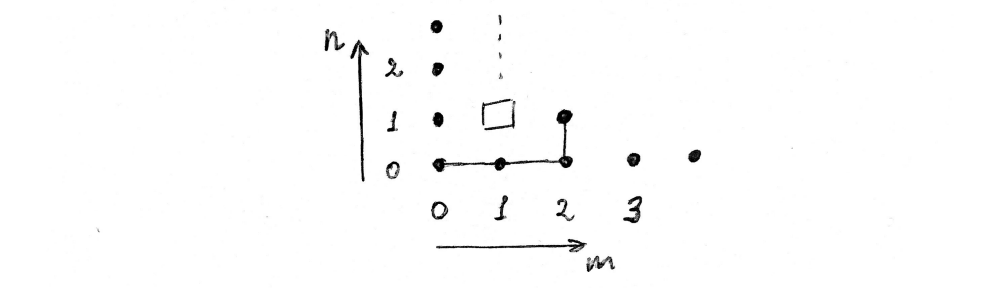

In [79]:
# функция численного решения Бима-Уорминга
def BW(a, R0, h, tau):
    sigma= (a*tau/h)
    M, N=int(L/h)+1, int(T/tau)+1
    R = np.zeros(M*N).reshape(N, M)
    R[0, :] = np.array([R0(x) for x in np.arange(0, L+h, h)]).copy()
    for n in range(0, N-1):
        if a > 0:
            R[:, 0] = np.array([R0(-a*n*tau) for n in np.arange(N)]).copy()
            for m in range(2, M):
                R[n+1, m] = R[n, m] - 0.5 * sigma * ( (3 - sigma) * R[n, m] + (2 * sigma - 4) * R[n, m-1] + (1 - sigma) * R[n, m-2] )
            # закрываем пропуски интерполяцией по 3м точкам 
            R[n+1, 1] = R[n+1, 0] + 0.5 * (R[n+1, 2] - R[n+1, 0]) + 1/3 * ( (R[n+1, 3] - R[n+1, 2]) - 0.5 * (R[n+1, 2] - R[n+1, 0]) )
        if a == 0:
            for m in range(0, M):
                R[n+1, m] = R[n, m]
    return R

#### Подбор параметров сетки

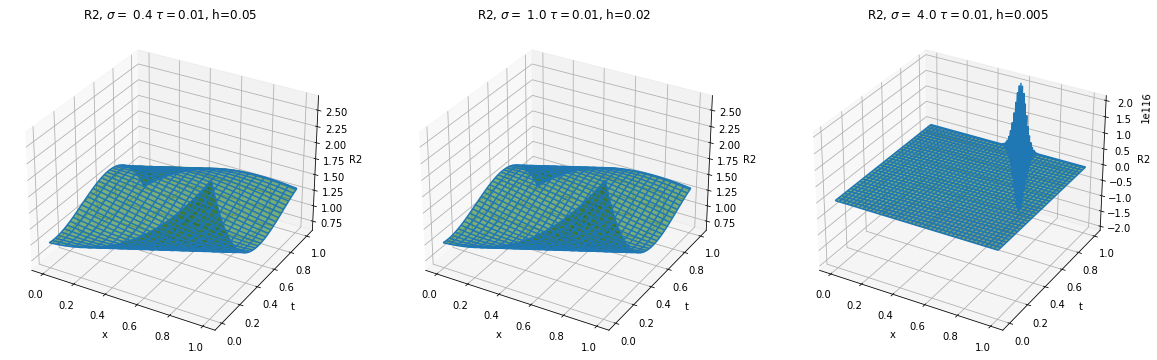

In [134]:
%matplotlib inline
fig = plt.figure(figsize = (20, 6))
tau = 0.01
h = [0.05, 0.02, 0.005]
a = 2
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    R2 = BW(a, R02, h[i], tau)
    x = np.arange(0, L+h[i], h[i])
    t = np.arange(0, T+tau, tau)
    x_, t_ = np.meshgrid(x, t)
    ax.plot_surface(x_, t_, R_th(x_, t_, a, R02), color = "green", alpha = 0.5)
    ax.plot_wireframe(x_,t_, R2)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel("R2")
    ax.set_title("R2, $\\sigma=$ "+ str(round(a*tau/h[i], 3))+" $\\tau=$"+str(tau)+", h="+str(h[i]))

Видим, что при малых числах Куранта ($\sigma < 2$) устойчивость сохраняется, тогда как при числе Куранта = 4 (на самом деле при $\sigma > 2$, значение 4 взято как пример), устойчивости нет.

#### Расчет интегралов Римана

sigma =  0.0


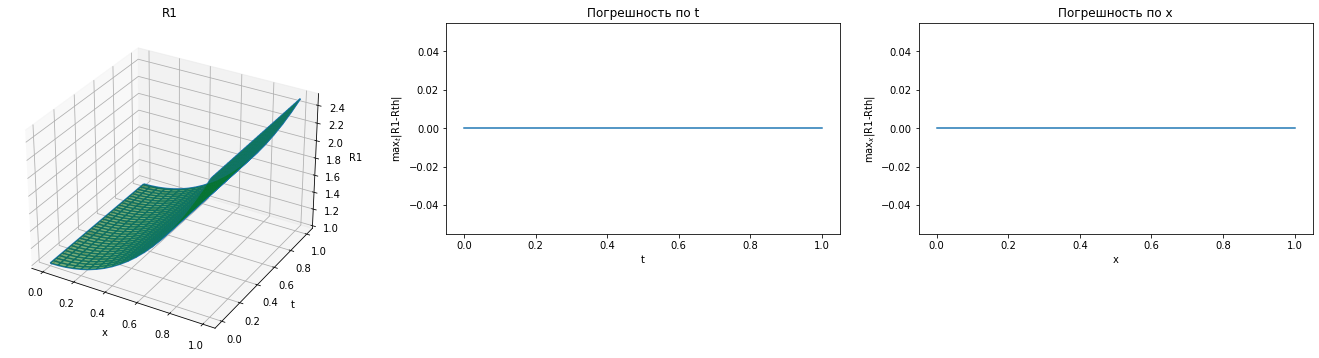

sigma =  0.39999999999999997


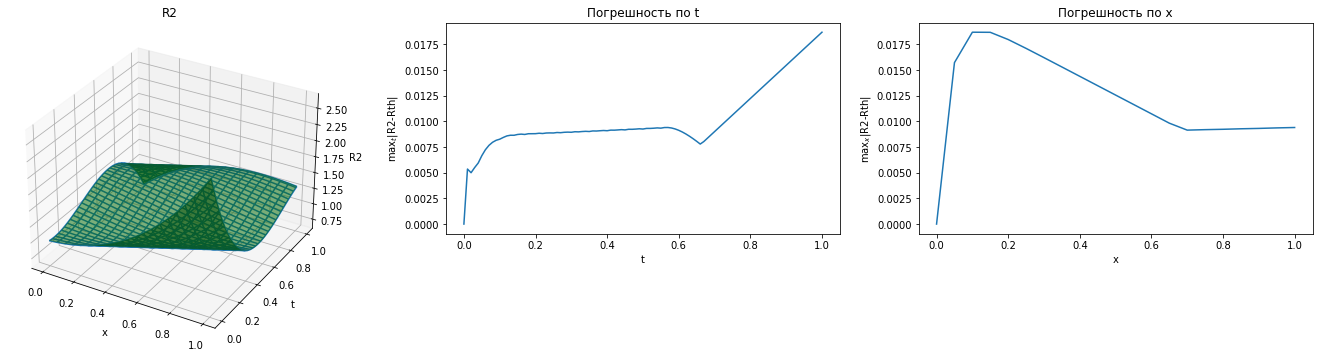

sigma =  1.4000000000000001


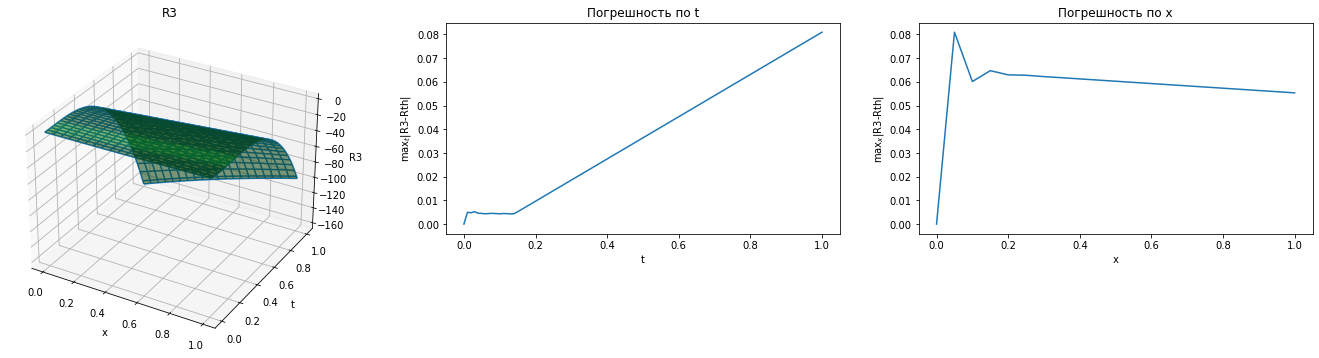

In [121]:
h, tau = 0.05, 0.01
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)
a1 = 0
R1 = BW(a1, R01, h, tau)
plot_nev(x, t, R1, "R1", a1, R01)
a2 = 2
R2 = BW(a2, R02, h, tau)
plot_nev(x, t, R2, "R2", a2, R02)
a3 = 7
R3 = BW(a3, R03, h, tau)
plot_nev(x, t, R3, "R3", a3, R03)

#### Численное решение исходного уравнения 

tau=0.01, h=0.048


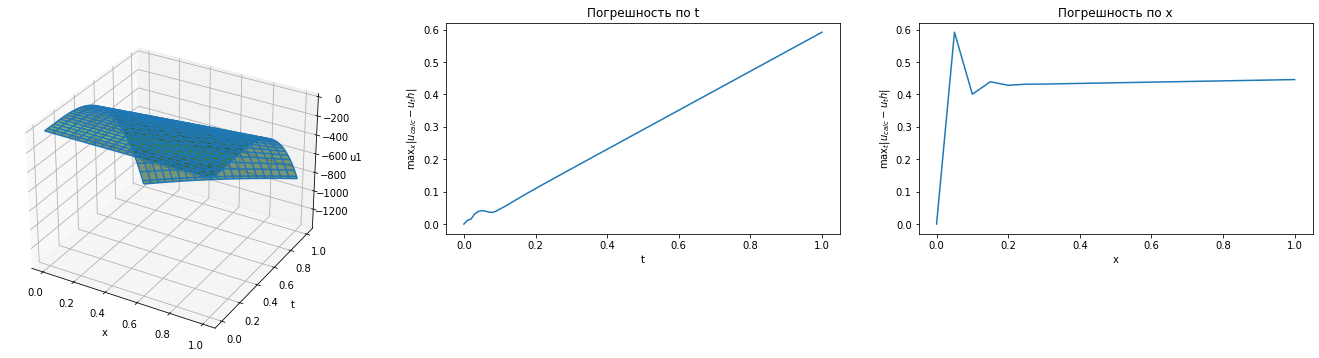

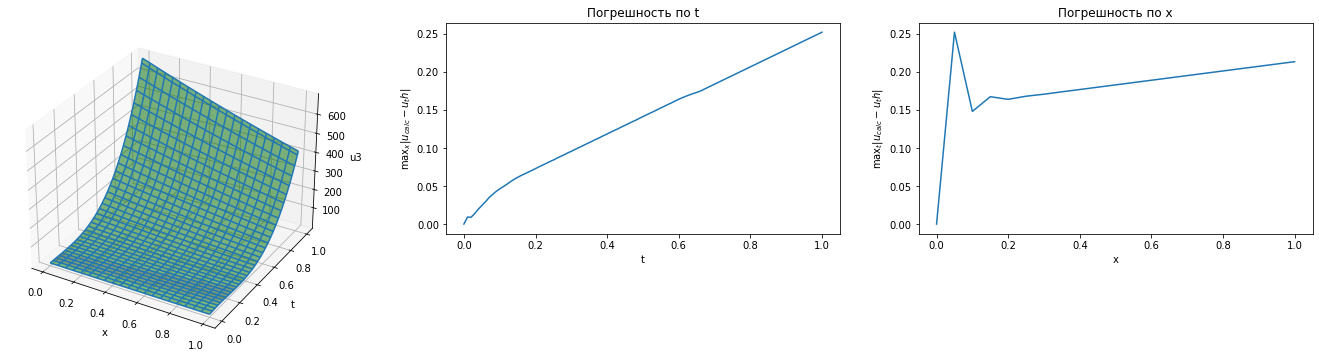

In [127]:
nev_t_BW, nev_x_BW = u(x, t, R1, R2, R3)

## Сравнение разностных схем

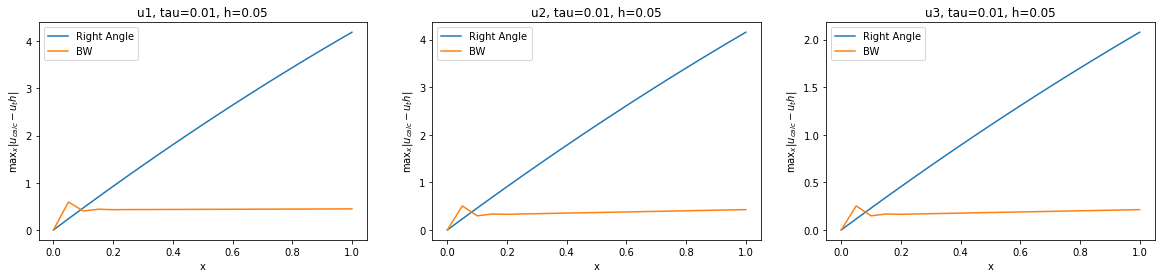

In [128]:
fig = plt.figure(figsize = (20, 4))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1) 
    ax.plot(t, nev_t_right_angle[i], label = "Right Angle")
    ax.plot(t, nev_t_BW[i], label = "BW")
    ax.set_xlabel("t")
    ax.set_ylabel("max$_t|u_{calc}-u_th|$")
    ax.set_title("u"+str(i+1)+", tau="+str(tau)+", h="+str(h))
    ax.legend()
fig = plt.figure(figsize = (20, 4))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    # новый массив, чтобы сравнять размерности графиков
    nev_x_new_RA = []
    if len(nev_x_right_angle[i]) > len(x):
        k = len(nev_x_right_angle[i]) // len(x)
        for j in range(len(x)):
            nev_x_new_RA.append(nev_x_right_angle[i][j*k])
    ax.plot(x, nev_x_new_RA, label = "Right Angle")
    ax.plot(x, nev_x_BW[i], label = "BW")
    ax.set_xlabel("x")
    ax.set_ylabel("max$_x|u_{calc}-u_th|$")
    ax.set_title("u"+str(i+1)+", tau="+str(tau)+", h="+str(h))
    ax.legend()

Погрешность схемы Бима-Уорнинга значительно меньше, чем погрешность схемы неявного правого уголка. Это происходит из-за того, что схема Бима-Уорминга имеет второй порядок апроксимации, а схема неявного правого уголка лишь первый.

### Апостериорный порядок сходимости схем


(за основу взят код Ирины Веретененко Б06-804)

In [129]:
def u_th(x_, t_):
    a1 = 0
    a2 = 2
    a3 = 7
    return np.array([(-14*R_th(x_, t_, a1, R01)-28*R_th(x_, t_, a2, R02)+42*R_th(x_, t_, a3, R03))/5,
                     (14*R_th(x_, t_, a1, R01)-56*R_th(x_, t_, a2, R02)+42*R_th(x_, t_, a3, R03))/5,
                     (-2*R_th(x_, t_, a1, R01)+28*R_th(x_, t_, a2, R02)-21*R_th(x_, t_, a3, R03))/5])
def u_calc(R1, R2, R3):
    return np.array([(-14*R1-28*R2+42*R3)/5, (14*R1-56*R2+42*R3)/5, (-2*R1+28*R2-21*R3)/5])
def tau(K, h, a):
    return round(K*h/a, 5)

In [130]:
def line(x, a, b):
    return a*np.array(x)+b
def fit(x, y_, xlab, ylab, name, ax):
    cnt=1
    p = list()
    for y in y_:
        pars, cov = curve_fit(f=line, xdata= x, ydata= y)
        a, b = pars[0], pars[1]
        p.append(a)
        sa = np.sqrt(cov[0,0])
        sb = np.sqrt(cov[1,1])
        ax.scatter(x, y, label = "u"+str(cnt))
        cnt+=1
        residuals = y - line(x, a, b)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y-np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        x_ = np.linspace(min(x), max(x), 100)
        ax.plot(x_, line(x_,a, b), linestyle = ":", label = "$y=ax+b$\n"+
        "$a$=(" + str(round(a, 3)) + "$\\pm$" + str(round(sa, 3)) + ") " + "\n"+
        "b=(" + str(round(b, 3)) + "$\\pm$" + str(round(sb, 3)) + ") \n" +
        "R$^2$="+str(round(r_squared, 5)))
    ax.legend(bbox_to_anchor=(1, 1), ncol=2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(name)
    return p

In [131]:
def r_method(ax, method, H, K):
    r1, r2, r3 = list(), list(), list()
    a1 = 0
    a2 = 2
    a3 = 7
    for h in H:
        x = np.arange(0, L+h, h)
        t = np.arange(0, T+tau(K, h, 1), tau(K, h, 1))
        x_, t_ = np.meshgrid(x, t)
        R1 = method(a1, R01, h, tau(K, h, 1))
        R2 = method(a2, R02, h, tau(K, h, 1))
        R3 = method(a3, R03, h, tau(K, h, 1))
        ucalc=u_calc(R1, R2, R3)
        uth = u_th(x_, t_)
        r1.append(np.max(abs(ucalc[0]-uth[0])))
        r2.append(np.max(abs(ucalc[1]-uth[1])))
        r3.append(np.max(abs(ucalc[2]-uth[2])))
    if method == RightAngle:
        name = "RightAngle"
    else:
        name = "BW"
    r = [r1, r2, r3]
    p = fit(np.log(H), np.log(r), "ln(h)", "ln(||$u_{calc}-u_{th}$||)", name, ax)
    return p

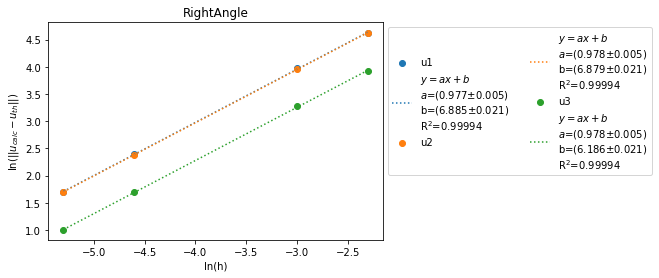

In [132]:
H=[0.1, 0.05, 0.01, 0.005]  # вариация шага сетки
K=2  # число Куранка, в районе которого наблюдается малая погрешность
fig = plt.figure()
ax = plt.subplot()
p = r_method(ax, RightAngle, H, K)

Наклон прямых для каждого решения близок к 1, что соответствует теоретическим ожиданиям первого порядка аппроксимации для схемы "неявный" правый уголок.

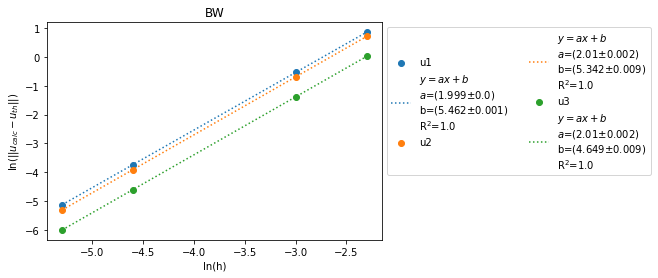

In [133]:
H=[0.1, 0.05, 0.01, 0.005]  # вариация шага сетки
K=0.2  # число Куранка, в районе которого наблюдается малая погрешность
fig = plt.figure()
ax = plt.subplot()
p = r_method(ax, BW, H, K)

Наклон прямых для каждого решения близок к 2, что соответствует теоретическим ожиданиям второго порядка аппроксимации для схемы Бима_Уорминга.

In [5]:
!jupyter nbconvert --to webpdf --allow-chromium-download HomeWork2_var30.ipynb

[NbConvertApp] Converting notebook HomeWork2_var30.ipynb to webpdf
[NbConvertApp] Building PDF
[INFO] Starting Chromium download.

  0%|          | 0.00/137M [00:00<?, ?b/s]
  0%|          | 51.2k/137M [00:00<04:44, 482kb/s]
  0%|          | 102k/137M [00:00<05:26, 420kb/s] 
  0%|          | 184k/137M [00:00<05:09, 441kb/s]
  0%|          | 276k/137M [00:00<04:03, 560kb/s]
  0%|          | 348k/137M [00:00<03:52, 589kb/s]
  0%|          | 410k/137M [00:00<04:22, 521kb/s]
  0%|          | 502k/137M [00:01<04:50, 470kb/s]
  0%|          | 594k/137M [00:01<04:44, 479kb/s]
  0%|          | 676k/137M [00:01<04:10, 543kb/s]
  1%|          | 737k/137M [00:01<05:19, 426kb/s]
  1%|          | 788k/137M [00:01<05:34, 407kb/s]
  1%|          | 881k/137M [00:01<04:39, 487kb/s]
  1%|          | 952k/137M [00:01<04:17, 528kb/s]
  1%|          | 1.01M/137M [00:02<04:50, 468kb/s]
  1%|          | 1.06M/137M [00:02<04:54, 461kb/s]
  1%|          | 1.15M/137M [00:02<04:30, 502kb/s]
  1%|          | 1.21

 10%|9         | 13.5M/137M [00:24<04:31, 454kb/s]
 10%|9         | 13.6M/137M [00:24<03:52, 530kb/s]
 10%|9         | 13.6M/137M [00:25<05:00, 410kb/s]
 10%|#         | 13.7M/137M [00:25<03:48, 538kb/s]
 10%|#         | 13.8M/137M [00:25<04:22, 469kb/s]
 10%|#         | 13.9M/137M [00:25<04:48, 426kb/s]
 10%|#         | 14.0M/137M [00:25<04:26, 462kb/s]
 10%|#         | 14.1M/137M [00:25<04:24, 465kb/s]
 10%|#         | 14.1M/137M [00:26<04:34, 447kb/s]
 10%|#         | 14.2M/137M [00:26<04:22, 468kb/s]
 10%|#         | 14.3M/137M [00:26<04:26, 461kb/s]
 11%|#         | 14.4M/137M [00:26<03:44, 547kb/s]
 11%|#         | 14.5M/137M [00:26<04:03, 503kb/s]
 11%|#         | 14.5M/137M [00:26<03:36, 564kb/s]
 11%|#         | 14.6M/137M [00:26<03:18, 617kb/s]
 11%|#         | 14.7M/137M [00:27<03:25, 594kb/s]
 11%|#         | 14.8M/137M [00:27<03:44, 544kb/s]
 11%|#         | 14.8M/137M [00:27<04:20, 468kb/s]
 11%|#         | 14.9M/137M [00:27<03:46, 539kb/s]
 11%|#         | 15.0M/137M [00

 24%|##3       | 32.8M/137M [01:03<03:55, 443kb/s]
 24%|##3       | 32.8M/137M [01:04<04:20, 399kb/s]
 24%|##4       | 32.9M/137M [01:04<03:40, 471kb/s]
 24%|##4       | 33.0M/137M [01:04<03:24, 508kb/s]
 24%|##4       | 33.1M/137M [01:04<03:00, 574kb/s]
 24%|##4       | 33.2M/137M [01:04<03:39, 472kb/s]
 24%|##4       | 33.2M/137M [01:04<03:38, 475kb/s]
 24%|##4       | 33.3M/137M [01:04<03:16, 528kb/s]
 24%|##4       | 33.4M/137M [01:05<03:44, 461kb/s]
 24%|##4       | 33.5M/137M [01:05<04:06, 420kb/s]
 25%|##4       | 33.6M/137M [01:05<03:11, 539kb/s]
 25%|##4       | 33.7M/137M [01:05<03:13, 534kb/s]
 25%|##4       | 33.7M/137M [01:05<03:36, 477kb/s]
 25%|##4       | 33.8M/137M [01:05<03:20, 514kb/s]
 25%|##4       | 33.9M/137M [01:06<02:58, 576kb/s]
 25%|##4       | 34.0M/137M [01:06<03:13, 531kb/s]
 25%|##4       | 34.0M/137M [01:06<03:08, 545kb/s]
 25%|##4       | 34.1M/137M [01:06<03:17, 521kb/s]
 25%|##4       | 34.2M/137M [01:06<02:50, 601kb/s]
 25%|##5       | 34.3M/137M [01

 90%|######### | 123M/137M [04:23<00:40, 335kb/s]
 90%|######### | 123M/137M [04:23<01:09, 195kb/s]
 90%|######### | 123M/137M [04:24<01:03, 213kb/s]
 90%|######### | 123M/137M [04:24<00:54, 248kb/s]
 90%|######### | 124M/137M [04:24<00:52, 257kb/s]
 90%|######### | 124M/137M [04:24<00:39, 338kb/s]
 90%|######### | 124M/137M [04:24<00:38, 343kb/s]
 90%|######### | 124M/137M [04:24<00:34, 378kb/s]
 90%|######### | 124M/137M [04:24<00:27, 479kb/s]
 90%|######### | 124M/137M [04:24<00:25, 513kb/s]
 91%|######### | 124M/137M [04:24<00:25, 507kb/s]
 91%|######### | 124M/137M [04:25<00:26, 490kb/s]
 91%|######### | 124M/137M [04:25<00:26, 480kb/s]
 91%|######### | 124M/137M [04:25<00:29, 436kb/s]
 91%|######### | 124M/137M [04:25<00:49, 259kb/s]
 91%|######### | 124M/137M [04:25<00:38, 332kb/s]
 91%|######### | 124M/137M [04:26<00:40, 315kb/s]
 91%|######### | 124M/137M [04:26<00:34, 366kb/s]
 91%|######### | 124M/137M [04:26<00:37, 335kb/s]
 91%|######### | 124M/137M [04:26<00:30, 408kb/s]
